In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pystan
from scipy.stats import mstats
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('./input/data-salary.txt')

In [4]:
data.head()

,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


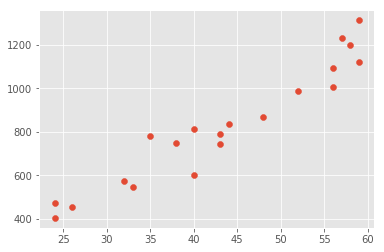

In [5]:
plt.scatter(data["X"], data["Y"])

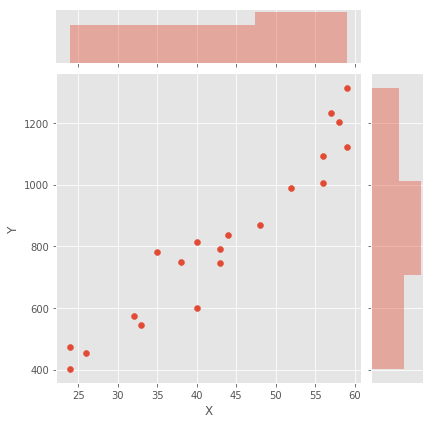

In [6]:
sns.jointplot(data=data, x='X', y='Y')

In [7]:
stan_model = """

data{
  int N;
  real X[N];
  real Y[N];
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}


model {
  for (n in 1:N){
    Y[n] ~ normal( a * X[n] + b, sigma);  
  }
}

"""

In [8]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3895c7eafbe04c0491b9472bbc617ad6 NOW.


In [9]:
stan_data = {}
stan_data['N'] = data.shape[0]
stan_data['X'] = data['X']
stan_data['Y'] = data['Y']

In [10]:
fit = sm.sampling(stan_data)

In [11]:
fit

Inference for Stan model: anon_model_3895c7eafbe04c0491b9472bbc617ad6.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a       21.9    0.05   1.66  18.58  20.81  21.89  22.91  25.32   1126    1.0
b     -118.7     2.2  74.67 -268.9 -165.4 -119.5 -70.23  29.23   1153    1.0
sigma  85.77     0.4  16.13  61.24  74.18  83.62  94.26 123.48   1633    1.0
lp__  -93.69    0.04   1.35 -97.23 -94.32 -93.32  -92.7 -92.16   1058    1.0

Samples were drawn using NUTS at Fri Apr 24 14:14:59 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

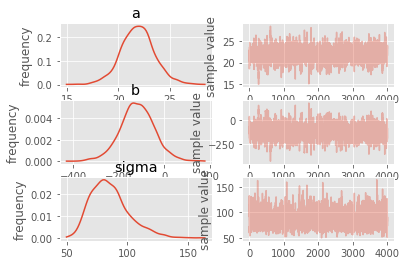

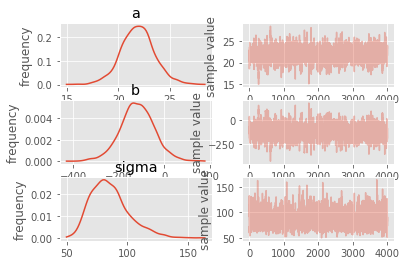

In [12]:
fit.plot()

In [13]:
fit.extract('a')['a']

array([23.47211651, 21.89120263, 21.35722818, ..., 20.55170223,
       23.9358317 , 24.12773695])

In [14]:
sample_a = fit.extract('a')['a']
sample_b = fit.extract('b')['b']
sample_sigma = fit.extract('sigma')['sigma']
sample_lp__ = fit.extract('lp__')['lp__']

(array([   7.,   20.,  137.,  482., 1163., 1296.,  636.,  199.,   50.,
          10.]),
 array([14.93267888, 16.28463856, 17.63659824, 18.98855792, 20.3405176 ,
        21.69247727, 23.04443695, 24.39639663, 25.74835631, 27.10031599,
        28.45227566]),
 <a list of 10 Patch objects>)

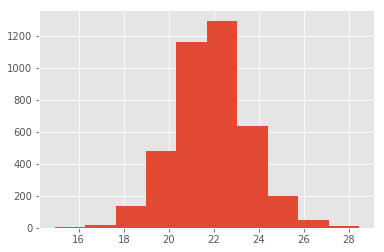

In [15]:
plt.hist(sample_a)

(array([   2.,   39.,  128.,  508., 1191., 1224.,  662.,  195.,   40.,
          11.]),
 array([-429.07547322, -368.44034566, -307.80521811, -247.17009056,
        -186.53496301, -125.89983545,  -65.2647079 ,   -4.62958035,
          56.0055472 ,  116.64067476,  177.27580231]),
 <a list of 10 Patch objects>)

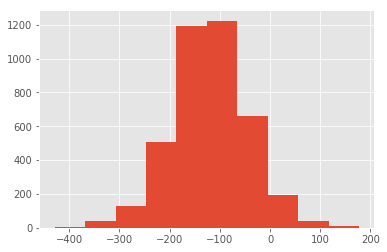

In [16]:
plt.hist(sample_b)

(array([ 101.,  763., 1185., 1033.,  496.,  254.,  111.,   37.,   14.,
           6.]), array([ 49.86236002,  61.26116553,  72.65997104,  84.05877656,
         95.45758207, 106.85638759, 118.2551931 , 129.65399862,
        141.05280413, 152.45160964, 163.85041516]), <a list of 10 Patch objects>)

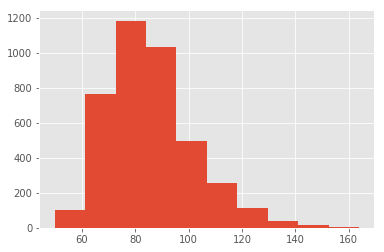

In [17]:
plt.hist(sample_sigma)

(array([   4.,    8.,   17.,   33.,   83.,  181.,  285.,  669., 1235.,
        1485.]),
 array([-101.6103631 , -100.65232949,  -99.69429589,  -98.73626228,
         -97.77822868,  -96.82019507,  -95.86216147,  -94.90412786,
         -93.94609425,  -92.98806065,  -92.03002704]),
 <a list of 10 Patch objects>)

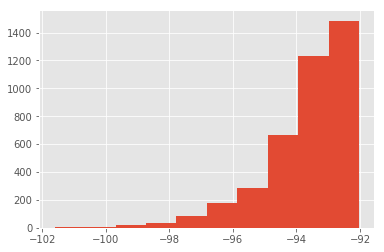

In [18]:
plt.hist(sample_lp__)

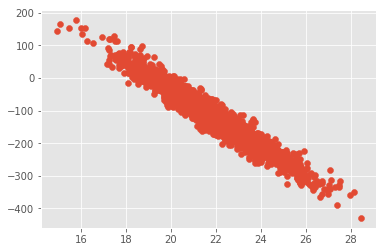

In [19]:
plt.scatter(sample_a, sample_b)

In [20]:
for_confidence = pd.DataFrame([])
for x in data['X'].unique():
    for_confidence[x] = sample_a * x + sample_b

In [21]:
for_confidence.head()

,24,26,32,33,35,38,40,43,44,48,52,56,57,58,59
0,402.255620,449.199853,590.032552,613.504669,660.448902,730.865251,777.809484,848.225834,871.697950,965.586417,1059.474883,1153.363349,1176.835465,1200.307582,1223.779698
1,432.500163,476.282569,607.629784,629.520987,673.303392,738.977000,782.759405,848.433013,870.324216,957.889026,1045.453837,1133.018648,1154.909850,1176.801053,1198.692255
2,403.913986,446.628442,574.771811,596.129039,638.843496,702.915180,745.629637,809.701321,831.058549,916.487462,1001.916375,1087.345287,1108.702516,1130.059744,1151.416972
3,400.320993,446.393775,584.612122,607.648513,653.721295,722.830469,768.903251,838.012424,861.048815,953.194380,1045.339944,1137.485508,1160.521900,1183.558291,1206.594682
4,414.841136,456.769470,582.554475,603.518642,645.446977,708.339480,750.267814,813.160317,834.124484,917.981154,1001.837824,1085.694493,1106.658661,1127.622828,1148.586996


In [22]:
lower50, upper50 = mstats.mquantiles(for_confidence, [0.25, 0.75], axis=0)
lower95, upper95 = mstats.mquantiles(for_confidence, [0.025, 0.975], axis=0)

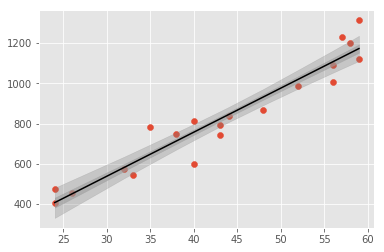

In [23]:
plt.scatter(data['X'], data['Y'])
plt.fill_between(data['X'].unique(), lower50, upper50, alpha=0.6, color='darkgray')
plt.fill_between(data['X'].unique(), lower95, upper95, alpha=0.3, color='gray')

x = data['X'].unique()
y = np.mean(sample_a) * x + np.mean(sample_b)
plt.plot(x, y, color='black')

In [24]:
stan_model2 = """

data{
  int N;
  real X[N];
  real Y[N];
  int N_new;
  real X_new[N_new];
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

transformed parameters {
  real y_base[N];
  for (n in 1:N){
    y_base[n] = a * X[n] + b;
  }
}

model {
  for (n in 1:N){
    Y[n] ~ normal(y_base[n], sigma);  
  }
}

generated quantities {
  real y_base_new[N_new];
  real y_new[N_new];
  for (n in 1:N_new){
    y_base_new[n] = a * X_new[n] + b;
    y_new[n] = normal_rng(y_base_new[n], sigma);
  }
}

"""

In [25]:
sm2 = pystan.StanModel(model_code=stan_model2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b9f9624c1ea24f13de11bb4092bfac76 NOW.


In [26]:
stan_data2 = {}
stan_data2['N'] = data.shape[0]
stan_data2['X'] = data['X']
stan_data2['Y'] = data['Y']

X_new = np.arange(20, 70)
stan_data2['N_new'] = len(X_new)
stan_data2['X_new'] =X_new

In [27]:
fit = sm2.sampling(stan_data2)

In [28]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_b9f9624c1ea24f13de11bb4092bfac76.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a               21.86    0.05    1.7  18.68  20.73  21.86   22.9  25.32   1291    1.0
b              -117.5    2.12  76.07 -271.4 -165.1 -116.9 -66.92  28.21   1291    1.0
sigma           84.86    0.36  15.02  61.19  74.16   83.0  93.99 118.63   1786    1.0
y_base[1]      407.06    1.01  38.23 330.97 382.62 407.24 432.24 481.65   1444    1.0
y_base[2]      407.06    1.01  38.23 330.97 382.62 407.24 432.24 481.65   1444    1.0
y_base[3]      450.77    0.92  35.37 380.37 428.07 450.76 474.23 519.99   1490    1.0
y_base[4]      581.91    0.66  27.55 527.02 564.27  582.2 599.54 636.02   1766    1.0
y_base[5]      603.77    0.61   26.4  551.0  586.7 603.97 620.67 655.22   1849    1

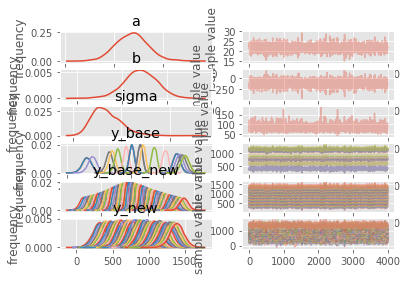

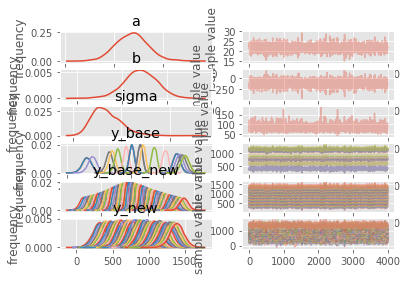

In [29]:
fit.plot()

In [30]:
sample_a = fit.extract('a')['a']
sample_b = fit.extract('b')['b']
sample_sigma = fit.extract('sigma')['sigma']
sample_lp__ = fit.extract('lp__')['lp__']
sample_y_new = fit.extract('y_new')['y_new']

In [31]:
sample_y_new

array([[ 414.22807247,  296.24022002,  380.05715422, ..., 1302.43057106,
        1437.14756275, 1574.86578753],
       [ 310.17339347,  279.26109719,  407.91786933, ..., 1251.93507276,
        1556.3203252 , 1486.27467372],
       [ 387.45330118,  446.55332122,  405.04540022, ..., 1263.40456949,
        1367.71971827, 1447.31520533],
       ...,
       [ 177.64820772,  134.62793751,  322.42536541, ..., 1435.28677252,
        1129.77946298, 1292.89261714],
       [ 321.64536193,  466.27996896,  286.75029093, ..., 1497.08320086,
        1382.30776667, 1328.50258169],
       [ 196.72568836,  373.03007948,  278.82880551, ..., 1296.46694318,
        1395.91206905, 1354.99423655]])

In [32]:
sample_y_new.shape

(4000, 50)

In [33]:
lower50, upper50 = mstats.mquantiles(sample_y_new, [0.25, 0.75], axis=0)
lower95, upper95 = mstats.mquantiles(sample_y_new, [0.025, 0.975], axis=0)

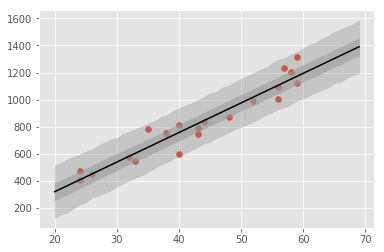

In [34]:
plt.scatter(data['X'], data['Y'])
plt.fill_between(X_new, lower50, upper50, alpha=0.6, color='darkgray')
plt.fill_between(X_new, lower95, upper95, alpha=0.3, color='gray')

x = X_new
y = np.mean(sample_a) * x + np.mean(sample_b)
plt.plot(x, y, color='black')